In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#csvの読み込み
#日時と半径加速度のみを抽出
# encoding="cp932" or "SHIFT-JIS"を入れないとエラーになる。
#日時をdatetime64型（Timestamp型）に変換する為にcp932に変換
#engine="python"で日本語パスが読める
df=pd.read_csv("C:/Users/H4869/Desktop/NORO/TR-COM/Sample_Data/b-M/toyo/TrendHourly_ｷﾞﾔｰ _Non Drive End_I_004FB5571C0C_20191204150235.csv",engine="python", index_col=None, parse_dates=["日時"], usecols=["日時","垂直(mm/s)"], encoding="cp932")
               

In [3]:
df.set_index("日時", inplace=True)

In [4]:
print(df.head())
print(df.tail())

                     垂直(mm/s)
日時                           
2018-08-07 14:44:00  0.162821
2018-08-07 15:44:00  0.162821
2018-08-07 16:44:00  2.116667
2018-08-07 17:44:00  2.238782
2018-08-07 18:44:00  2.116667
                     垂直(mm/s)
日時                           
2019-11-19 05:34:00  5.007432
2019-11-19 06:34:00  0.169342
2019-11-19 07:34:00  0.048387
2019-11-19 08:34:00  5.128387
2019-11-20 11:37:00  3.132658


In [5]:
#データ型の確認
print(df.dtypes)
print(df.index)

垂直(mm/s)    float64
dtype: object
DatetimeIndex(['2018-08-07 14:44:00', '2018-08-07 15:44:00',
               '2018-08-07 16:44:00', '2018-08-07 17:44:00',
               '2018-08-07 18:44:00', '2018-08-07 19:44:00',
               '2018-08-07 20:44:00', '2018-08-07 21:44:00',
               '2018-08-07 22:44:00', '2018-08-07 23:44:00',
               ...
               '2019-11-19 00:34:00', '2019-11-19 01:34:00',
               '2019-11-19 02:34:00', '2019-11-19 03:34:00',
               '2019-11-19 04:34:00', '2019-11-19 05:34:00',
               '2019-11-19 06:34:00', '2019-11-19 07:34:00',
               '2019-11-19 08:34:00', '2019-11-20 11:37:00'],
              dtype='datetime64[ns]', name='日時', length=11950, freq=None)


In [6]:
#日時をdatetime64型（Timestamp型）に変換
#df["日時"]=pd.to_datetime(df["日時"])

In [7]:
#変換後のデータ型の確認
#print(df.dtypes)
#print(type(df["日時"][3]))

In [8]:
#データ数の確認
print("全データ数 ")
print(df.info())

print("欠損値 : ")
print(df.isnull().sum())

全データ数 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11950 entries, 2018-08-07 14:44:00 to 2019-11-20 11:37:00
Data columns (total 1 columns):
垂直(mm/s)    11950 non-null float64
dtypes: float64(1)
memory usage: 186.7 KB
None
欠損値 : 
垂直(mm/s)    0
dtype: int64


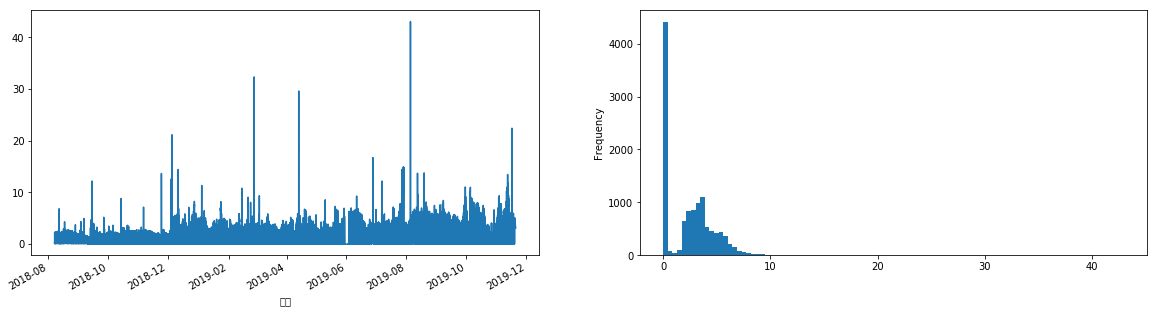

In [9]:
#原系列のプロット
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df["垂直(mm/s)"].plot()
plt.subplot(1,2,2)
df["垂直(mm/s)"].plot.hist(bins=100)


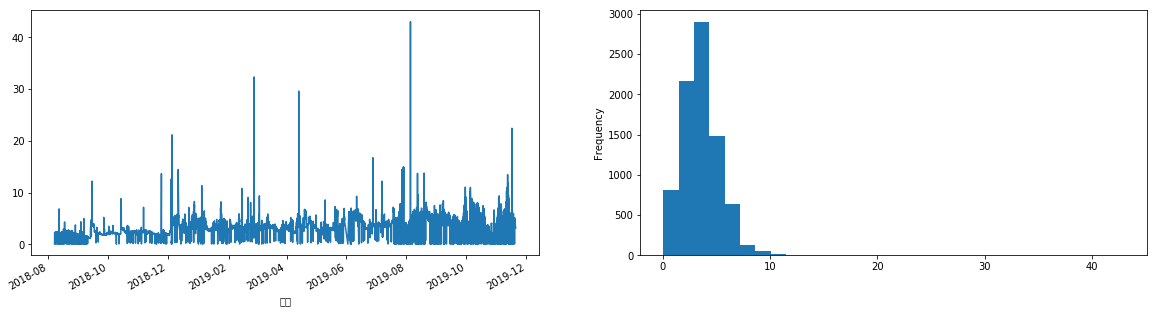

In [10]:
#起動しきい値以上のみ抽出
#起動検知しきい値又は手入力

limit=0.01 #しきい値

df_filtered=df[df["垂直(mm/s)"]>limit]

#データをプロット
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df_filtered["垂直(mm/s)"].plot()
plt.subplot(1,2,2)
df_filtered["垂直(mm/s)"].plot.hist(bins=30)


In [11]:
len(df_filtered)

8211

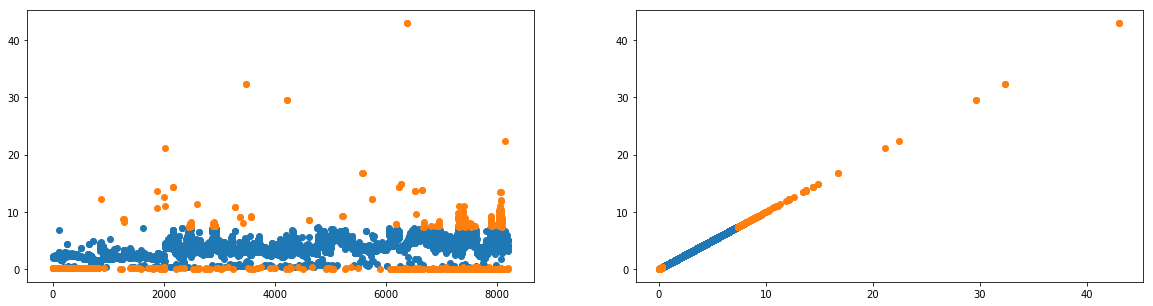

In [12]:
#LOFによる外れ値検

from sklearn.neighbors import LocalOutlierFactor

#arrayに変換
array_df_filtered=df_filtered["垂直(mm/s)"].values.reshape(-1, 1)
#array_date=df_filtered.index.values.reshape(-1, 1)
array_date=df_filtered.index.to_pydatetime().reshape(-1, 1)

#The default value of contamination will change from 0.1 in v0.20 to 'auto' in v0.22.
lof=LocalOutlierFactor(n_neighbors=len(array_df_filtered)//3) #全データの1/3 (=3つの運転モード)
pred=lof.fit_predict(array_df_filtered)
# 正常: 1、異常: -1

#散布図をプロットして外れ値を確認
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
# 正常データのプロット
plt.scatter(np.where(pred > 0), array_df_filtered[np.where(pred > 0)])
# 異常データのプロット
plt.scatter(np.where(pred < 0), array_df_filtered[np.where(pred < 0)])

plt.subplot(1,2,2)
# 正常データのプロット
plt.scatter(array_df_filtered[np.where(pred > 0)], array_df_filtered[np.where(pred > 0)])
# 異常データのプロット
plt.scatter(array_df_filtered[np.where(pred < 0)], array_df_filtered[np.where(pred < 0)])


In [13]:
data_mod=array_df_filtered[np.where(pred > 0)]
date_mod=array_date[np.where(pred > 0)]

data_mod_comb=np.concatenate([date_mod,data_mod],1)
df_mod=pd.DataFrame(data_mod_comb, columns=["日時","垂直(mm/s)"])

df_mod

,日時,垂直(mm/s)
0,2018-08-07 16:44:00,2.11667
1,2018-08-07 17:44:00,2.23878
2,2018-08-07 18:44:00,2.11667
3,2018-08-07 19:44:00,2.19808
4,2018-08-08 00:44:00,2.11667
5,2018-08-08 01:44:00,1.99455
6,2018-08-08 02:44:00,2.15737
7,2018-08-08 03:44:00,2.19808
8,2018-08-08 08:44:00,2.3609
9,2018-08-08 09:44:00,2.32019


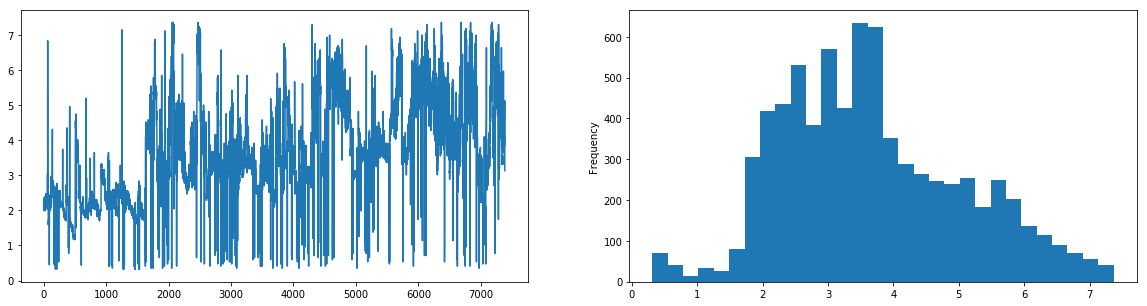

In [14]:
#データをプロット
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df_mod["垂直(mm/s)"].plot()
plt.subplot(1,2,2)
df_mod["垂直(mm/s)"].plot.hist(bins=30)

In [15]:
#データの確認
print(df_mod.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 2 columns):
日時          7385 non-null object
垂直(mm/s)    7385 non-null object
dtypes: object(2)
memory usage: 115.5+ KB
None


In [32]:
#データ出力
#df_mod.to_csv("C:/Users/H4869/Desktop/NORO/TR-COM/Sample_Data/output/data_out.csv")

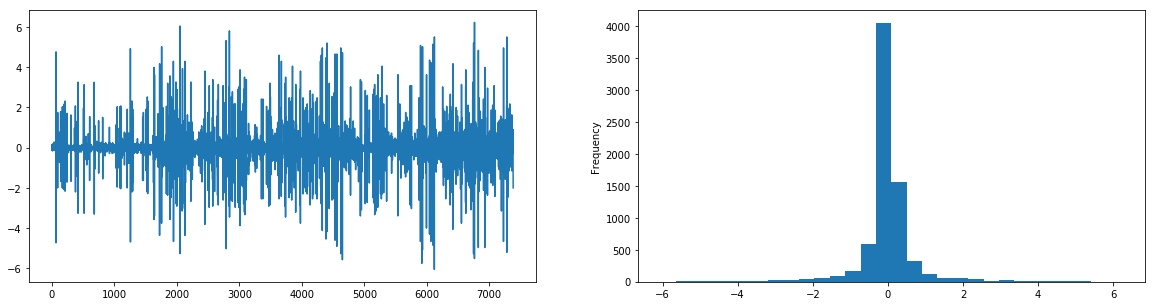

In [16]:
#1次階差

df_mod_diff=df_mod["垂直(mm/s)"].diff().dropna()

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df_mod_diff.plot()

#ヒストグラムを確認
plt.subplot(1,2,2)
df_mod_diff.plot.hist(bins=30)


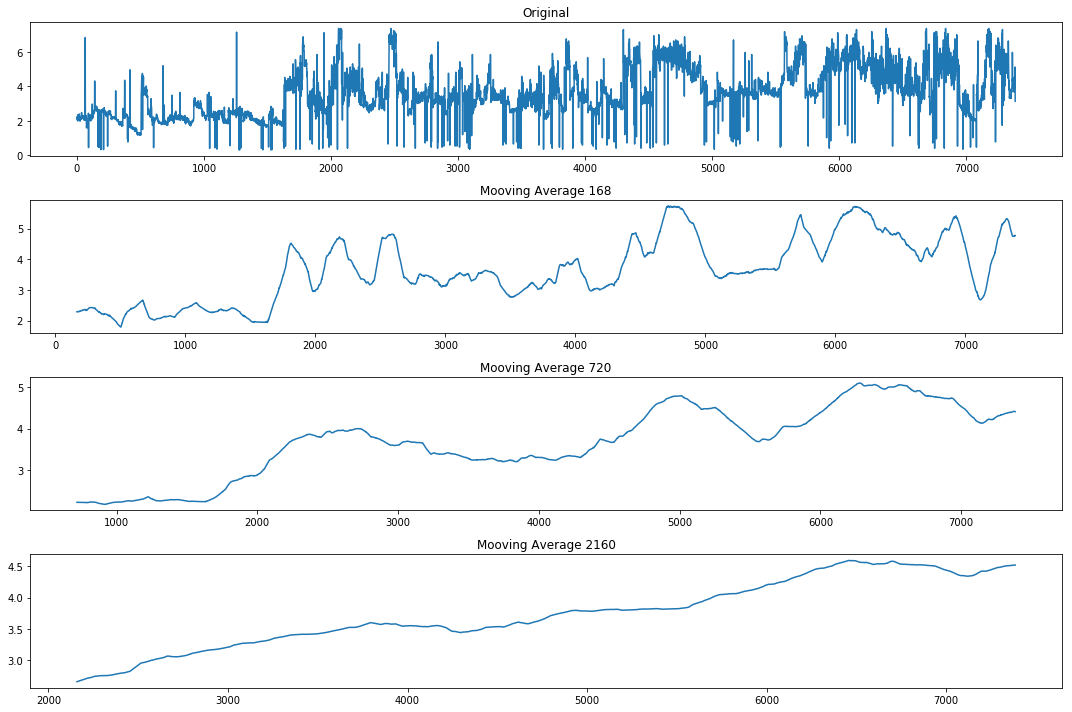

In [18]:
#移動平均のプロット
#期間は固定だが、将来的にはデータ数に対し変動させる

#24x7=168hr : 正味運転時間　1週間
mv1=168
#24x30=720hr : 正味運転時間 1か月
mv2=720
#24*90=2160hr : 正味運転時間 3か月
mv3=2160


plt.figure(figsize=(15, 10))

plt.subplot(4,1,1)
plt.plot(df_mod['垂直(mm/s)'], label="Acc")
plt.title("Original")

plt.subplot(4,1,2)
plt.plot(df_mod["垂直(mm/s)"].rolling(mv1).mean())
plt.title("Mooving Average {}".format(mv1))

plt.subplot(4,1,3)
plt.plot(df_mod["垂直(mm/s)"].rolling(mv2).mean())
plt.title("Mooving Average {}".format(mv2))

plt.subplot(4,1,4)
plt.plot(df_mod["垂直(mm/s)"].rolling(mv3).mean())
plt.title("Mooving Average {}".format(mv3))

plt.tight_layout() 

In [19]:
limit1=8 #しきい置1
limit2=10 #しきい置2

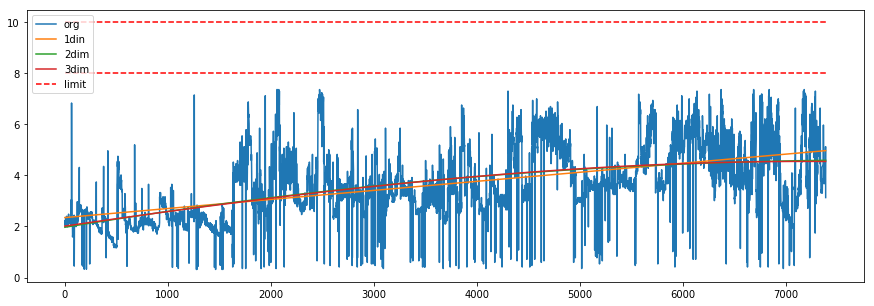

1次 : [3.55322460e-04 2.34864579e+00]
2次 : [-4.17035237e-08  6.63261278e-04  1.96972707e+00]
3次 : [-2.28276823e-12 -1.64195828e-08  5.88587687e-04  2.01566067e+00]


In [20]:
#np.polyfit(通常最小二乗法によるカーブフィット)*************************************************
#原系列（事前処理後）に対し
#全期間対象

# 説明変数x
x=np.arange(len(date_mod)).reshape(-1, 1)
# 目的変数y
y=df_mod["垂直(mm/s)"]

#近似式の係数
res1=np.polyfit(x.reshape(-1), y, 1)
res2=np.polyfit(x.reshape(-1), y, 2)
res3=np.polyfit(x.reshape(-1), y, 3)
#近似式の計算
y1 = np.poly1d(res1)(x) #1次
y2 = np.poly1d(res2)(x) #2次
y3 = np.poly1d(res3)(x) #3次
#グラフ表示
plt.figure(figsize=(15, 5))
plt.plot(x,y, label='org')
plt.plot(x, y1, label='1din')
plt.plot(x, y2, label='2dim')
plt.plot(x, y3, label='3dim')
plt.hlines([limit1, limit2], 0, len(x), linestyle="dashed", color="r",label='limit')
plt.legend()
plt.show()

print("1次 : {}".format(res1))
print("2次 : {}".format(res2))
print("3次 : {}".format(res3))


In [21]:
#寿命計算
#とりあえず1次のみ

#limit1
poly_future1=len(x)
poly_pred1=np.poly1d(res1)(poly_future1) #1次のみ

#limit2
poly_future2=len(x)
poly_pred2=np.poly1d(res1)(poly_future2) #1次のみ

if poly_pred1 > limit1:
        print("既にしきい値1を超えています")  

while poly_pred1 < limit1:
    poly_future1+=1
    poly_pred1=np.poly1d(res1)(poly_future1)
    
    if poly_pred1 >= limit1:
        print("注意しきい値まで：{} hr - {} days".format(poly_future1-len(x), (poly_future1-len(x))//24))
        break
        
if poly_pred2 > limit2:
        print("既にしきい値2を超えています")  

while poly_pred2 < limit2:
    poly_future2+=1
    poly_pred2=np.poly1d(res1)(poly_future2)
    
    if poly_pred2 >= limit2:
        print("危険しきい値まで：{} hr - {} days".format(poly_future2-len(x), (poly_future2-len(x))//24))
        break
        
#経年劣化考慮要？

注意しきい値まで：8520 hr - 355 days
危険しきい値まで：14149 hr - 589 days


mv1 : [3.58138347e-04 2.37507492e+00]
mv2 : [3.73901262e-04 2.45322320e+00]
mv3 : [3.40137329e-04 2.86217917e+00]


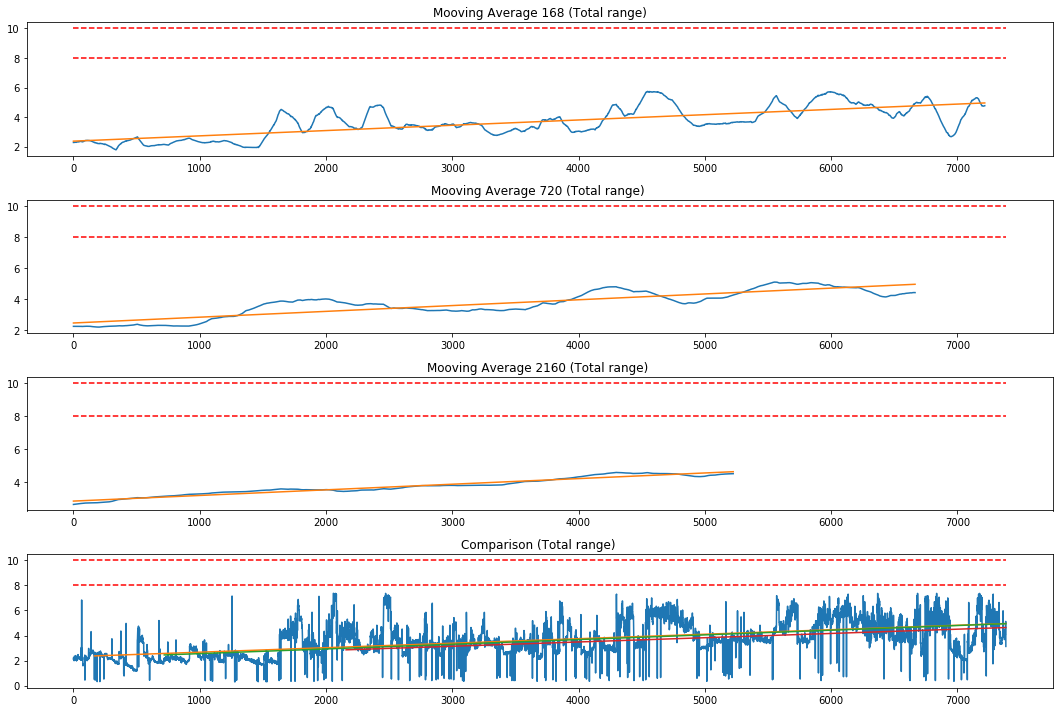

In [22]:
#np.polyfit(通常最小二乗法によるカーブフィット)*************************************************
#各移動平均に対し
#全期間対象

#目的変数
mv1_curve=df_mod["垂直(mm/s)"].rolling(mv1).mean().dropna()
mv2_curve=df_mod["垂直(mm/s)"].rolling(mv2).mean().dropna()
mv3_curve=df_mod["垂直(mm/s)"].rolling(mv3).mean().dropna()

#説明変数
x_mv1=np.arange(len(mv1_curve)).reshape(-1, 1)
x_mv2=np.arange(len(mv2_curve)).reshape(-1, 1)
x_mv3=np.arange(len(mv3_curve)).reshape(-1, 1)

#近似式の係数
res_mv1=np.polyfit(x_mv1.reshape(-1), mv1_curve, 1) #1次
res_mv2=np.polyfit(x_mv2.reshape(-1), mv2_curve, 1) #1次
res_mv3=np.polyfit(x_mv3.reshape(-1), mv3_curve, 1) #1次
#データが足りないとエラー出る

#近似式の計算
y_mv1 = np.poly1d(res_mv1)(x_mv1) #mv1
y_mv2 = np.poly1d(res_mv2)(x_mv2) #mv2
y_mv3 = np.poly1d(res_mv3)(x_mv3) #mv3
#グラフ表示
plt.figure(figsize=(15, 10))

plt.subplot(4,1,1)
plt.plot(x_mv1, mv1_curve)
plt.plot(x_mv1, y_mv1)
plt.hlines([limit1, limit2], 0, len(x), linestyle="dashed", color="r")
plt.title("Mooving Average {} (Total range)".format(mv1))

plt.subplot(4,1,2)
plt.plot(x_mv2, mv2_curve)
plt.plot(x_mv2, y_mv2)
plt.hlines([limit1, limit2], 0, len(x), linestyle="dashed", color="r")
plt.title("Mooving Average {} (Total range) ".format(mv2))

plt.subplot(4,1,3)
plt.plot(x_mv3, mv3_curve)
plt.plot(x_mv3, y_mv3)
plt.hlines([limit1, limit2], 0, len(x), linestyle="dashed", color="r")
plt.title("Mooving Average {} (Total range) ".format(mv3))

plt.subplot(4,1,4)
plt.plot(x,y)
plt.plot(np.arange(mv1-1,len(y)).reshape(-1,1), y_mv1)
plt.plot(np.arange(mv2-1,len(y)).reshape(-1,1), y_mv2)
plt.plot(np.arange(mv3-1,len(y)).reshape(-1,1), y_mv3)
plt.hlines([limit1, limit2], 0, len(x), linestyle="dashed", color="r")
plt.title("Comparison (Total range) ")


plt.tight_layout() 

print("mv1 : {}".format(res_mv1))
print("mv2 : {}".format(res_mv2))
print("mv3 : {}".format(res_mv3))


In [23]:
#寿命計算

#mv1*******************************
poly_mv1_future1=len(x_mv1)
poly_mv1_future2=len(x_mv1)

poly_mv1_pred1=np.poly1d(res_mv1)(poly_mv1_future1)
poly_mv1_pred2=np.poly1d(res_mv1)(poly_mv1_future2)

if poly_mv1_pred1 > limit1:
        print("mv1 : 既にしきい値1を超えています")  

while poly_mv1_pred1 < limit1:
    poly_mv1_future1+=1
    poly_mv1_pred1=np.poly1d(res_mv1)(poly_mv1_future1)
    
    if poly_mv1_pred1 >= limit1:
        print("mv1 : 注意しきい値まで：{} hr - {} days".format(poly_mv1_future1-len(x),(poly_mv1_future1-len(x)//24)))
        break
        
if poly_mv1_pred2 > limit2:
        print("mv1 : 既にしきい値2を超えています")  

while poly_mv1_pred2 < limit2:
    poly_mv1_future2+=1
    poly_mv1_pred2=np.poly1d(res_mv1)(poly_mv1_future2)
    
    if poly_mv1_pred2 >= limit2:
        print("mv1 : 危険しきい値まで：{} hr - {} days".format(poly_mv1_future2-len(x),(poly_mv1_future2-len(x)//24)))
        break
#mv2*******************************
poly_mv2_future1=len(x_mv2)
poly_mv2_future2=len(x_mv2)

poly_mv2_pred1=np.poly1d(res_mv2)(poly_mv2_future1)
poly_mv2_pred2=np.poly1d(res_mv2)(poly_mv2_future2)

if poly_mv2_pred1 > limit1:
        print("mv2 : 既にしきい値1を超えています")  

while poly_mv2_pred1 < limit1:
    poly_mv2_future1+=1
    poly_mv2_pred1=np.poly1d(res_mv2)(poly_mv2_future1)
    
    if poly_mv2_pred1 >= limit1:
        print("mv2 : 注意しきい値まで：{} hr - {} days".format(poly_mv2_future1-len(x),(poly_mv2_future1-len(x)//24)))
        break
        
if poly_mv2_pred2 > limit2:
        print("mv2 : 既にしきい値2を超えています")  

while poly_mv2_pred2 < limit2:
    poly_mv2_future2+=1
    poly_mv2_pred2=np.poly1d(res_mv2)(poly_mv2_future2)
    
    if poly_mv2_pred2 >= limit2:
        print("mv2 : 危険しきい値まで：{} hr - {} days".format(poly_mv2_future2-len(x),(poly_mv2_future2-len(x)//24)))
        break        
        
#mv3*******************************
poly_mv3_future1=len(x_mv3)
poly_mv3_future2=len(x_mv3)
poly_mv3_pred1=np.poly1d(res_mv3)(poly_mv3_future1)
poly_mv3_pred2=np.poly1d(res_mv3)(poly_mv3_future2)

if poly_mv3_pred1 > limit1:
        print("mv3 : 既にしきい値1を超えています")  

while poly_mv3_pred1 < limit1:
    poly_mv3_future1+=1
    poly_mv3_pred1=np.poly1d(res_mv3)(poly_mv3_future1)
    
    if poly_mv3_pred1 >= limit1:
        print("mv3 : 注意しきい値まで：{} hr - {} days".format(poly_mv3_future1-len(x),(poly_mv3_future1-len(x)//24)))
        break
        
if poly_mv3_pred2 > limit2:
        print("mv3 : 既にしきい値2を超えています")  

while poly_mv3_pred2 < limit2:
    poly_mv3_future2+=1
    poly_mv3_pred2=np.poly1d(res_mv3)(poly_mv3_future2)
    
    if poly_mv3_pred2 >= limit2:
        print("mv3 : 危険しきい値まで：{} hr - {} days".format(poly_mv3_future2-len(x),(poly_mv3_future2-len(x)//24)))
        break        

mv1 : 注意しきい値まで：8322 hr - 15400 days
mv1 : 危険しきい値まで：13906 hr - 20984 days
mv2 : 注意しきい値まで：7450 hr - 14528 days
mv2 : 危険しきい値まで：12799 hr - 19877 days
mv3 : 注意しきい値まで：7721 hr - 14799 days
mv3 : 危険しきい値まで：13601 hr - 20679 days


mv1 --- 回帰係数 : 0.00035813834651695085, 切片 : 2.375074922798354, 決定係数 : 0.3582173915346768
mv2 --- 回帰係数 : 0.0003739012616262078, 切片 : 2.4532231983143546, 決定係数 : 0.6107962070868503
mv3 --- 回帰係数 : 0.0003401373287491566, 切片 : 2.8621791737208246, 決定係数 : 0.9483481067305994


Text(0.5,1,'Comparison (Total range) ')

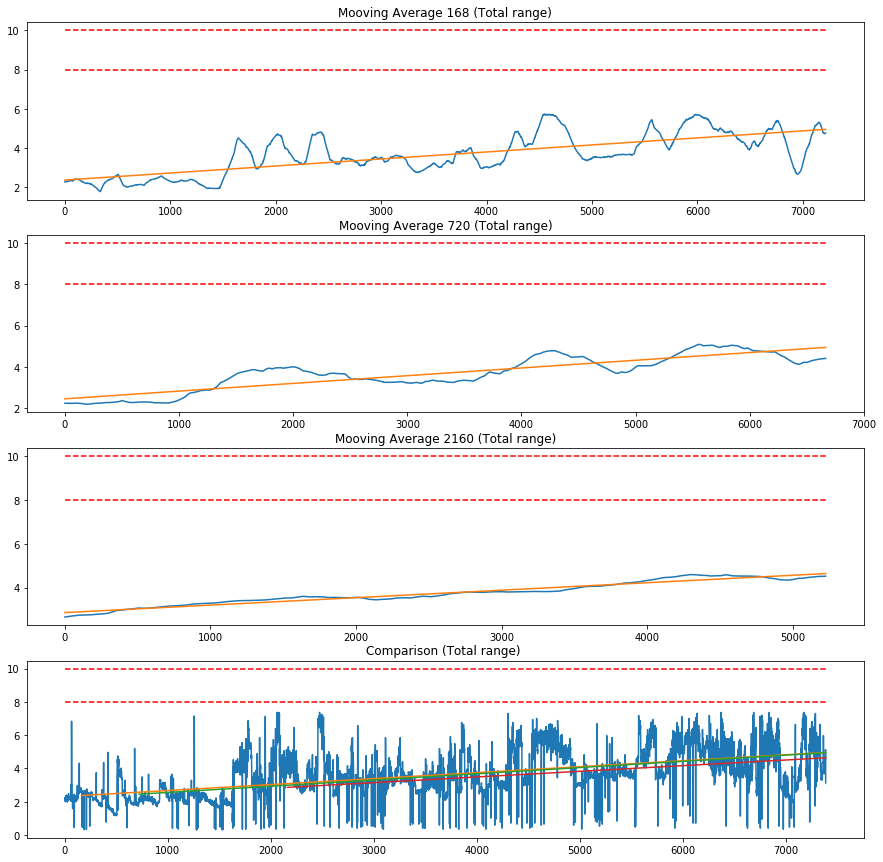

In [25]:
#sklearnによる単回帰*************************************************
#各移動平均期間に対し
#対象は全期間

from sklearn import linear_model

# 線形回帰モデル
lr=linear_model.LinearRegression()

#予測モデルを作成（単回帰）
# 各パラメータ（回帰係数、切片）は上書きされるので、都度抽出
mod_mv1=lr.fit(x_mv1,mv1_curve)
[a1] = mod_mv1.coef_
b1 = mod_mv1.intercept_

mod_mv2=lr.fit(x_mv2,mv2_curve)
[a2] = mod_mv2.coef_
b2 = mod_mv2.intercept_

mod_mv3=lr.fit(x_mv3,mv3_curve)
[a3] = mod_mv3.coef_
b3 = mod_mv3.intercept_

# パラメータの表示
print("mv1 --- 回帰係数 : {}, 切片 : {}, 決定係数 : {}".format(a1,b1, mod_mv1.score(x_mv1,mv1_curve)))
print("mv2 --- 回帰係数 : {}, 切片 : {}, 決定係数 : {}".format(a2,b2, mod_mv2.score(x_mv2,mv2_curve)))
print("mv3 --- 回帰係数 : {}, 切片 : {}, 決定係数 : {}".format(a3,b3, mod_mv3.score(x_mv3,mv3_curve)))

#プロット
plt.figure(figsize=(15, 15))

plt.subplot(4,1,1)
plt.plot(x_mv1,mv1_curve)
plt.plot(x_mv1*a1+b1)
plt.hlines([limit1, limit2], 0, len(x_mv1), linestyle="dashed", color="r")
plt.title("Mooving Average {} (Total range)".format(mv1))

plt.subplot(4,1,2)
plt.plot(x_mv2,mv2_curve)
plt.plot(x_mv2*a2+b2)
plt.hlines([limit1, limit2], 0, len(x_mv2), linestyle="dashed", color="r")
plt.title("Mooving Average {} (Total range)".format(mv2))

plt.subplot(4,1,3)
plt.plot(x_mv3,mv3_curve)
plt.plot(x_mv3*a3+b3)
plt.hlines([limit1, limit2], 0, len(x_mv3), linestyle="dashed", color="r")
plt.title("Mooving Average {} (Total range)".format(mv3))

plt.subplot(4,1,4)
plt.plot(x,y)
plt.plot(np.arange(mv1-1,len(y)).reshape(-1,1),x_mv1*a1+b1)
plt.plot(np.arange(mv2-1,len(y)).reshape(-1,1),x_mv2*a2+b2)
plt.plot(np.arange(mv3-1,len(y)).reshape(-1,1),x_mv3*a3+b3)
plt.hlines([limit1, limit2], 0, len(x), linestyle="dashed", color="r")
plt.title("Comparison (Total range) ")

In [30]:
#寿命計算

#mv1*******************************
mod_mv1_future1=len(x_mv1)
mod_mv1_future2=len(x_mv1)

mod_mv1_pred1=mod_mv1_future1*a1+b1
mod_mv1_pred2=mod_mv1_future2*a1+b1

if mod_mv1_pred1 > limit1:
        print("mv1 : 既にしきい値1を超えています")  

while mod_mv1_pred1 < limit1:
    mod_mv1_future1+=1
    mod_mv1_pred1=mod_mv1_future1*a1+b1
    
    if mod_mv1_pred1 >= limit1:
        print("mv1 : 注意しきい値まで：{} hr - {} days".format(mod_mv1_future1-len(x),(mod_mv1_future1-len(x)//24)))
        break
        
if mod_mv1_pred2 > limit2:
        print("mv1 : 既にしきい値2を超えています")  

while mod_mv1_pred2 < limit2:
    mod_mv1_future2+=1
    mod_mv1_pred2=mod_mv1_future2*a1+b1
    
    if mod_mv1_pred2 >= limit2:
        print("mv1 : 危険しきい値まで：{} hr - {} days".format(mod_mv1_future2-len(x),(mod_mv1_future2-len(x)//24)))
        break

#mv2*******************************
mod_mv2_future1=len(x_mv2)
mod_mv2_future2=len(x_mv2)

mod_mv2_pred1=mod_mv2_future1*a2+b2
mod_mv2_pred2=mod_mv2_future2*a2+b2

if mod_mv2_pred1 > limit1:
        print("mv2 : 既にしきい値1を超えています")  

while mod_mv2_pred1 < limit1:
    mod_mv2_future1+=1
    mod_mv2_pred1=mod_mv2_future1*a2+b2
    
    if mod_mv2_pred1 >= limit1:
        print("mv2 : 注意しきい値まで：{} hr - {} days".format(mod_mv2_future1-len(x),(mod_mv2_future1-len(x)//24)))
        break
        
if mod_mv2_pred2 > limit2:
        print("mv2 : 既にしきい値2を超えています")  

while mod_mv2_pred2 < limit2:
    mod_mv2_future2+=1
    mod_mv2_pred2=mod_mv2_future2*a2+b2
    
    if mod_mv2_pred2 >= limit2:
        print("mv2 : 危険しきい値まで：{} hr - {} days".format(mod_mv2_future2-len(x),(mod_mv2_future2-len(x)//24)))
        break

#mv3*******************************
mod_mv3_future1=len(x_mv3)
mod_mv3_future2=len(x_mv3)

mod_mv3_pred1=mod_mv3_future1*a3+b3
mod_mv3_pred2=mod_mv3_future2*a3+b3

if mod_mv3_pred1 > limit1:
        print("mv2 : 既にしきい値1を超えています")  

while mod_mv3_pred1 < limit1:
    mod_mv3_future1+=1
    mod_mv3_pred1=mod_mv3_future1*a3+b3
    
    if mod_mv3_pred1 >= limit1:
        print("mv3 : 注意しきい値まで：{} hr - {} days".format(mod_mv3_future1-len(x),(mod_mv3_future1-len(x)//24)))
        break
        
if mod_mv3_pred2 > limit2:
        print("mv3 : 既にしきい値2を超えています")  

while mod_mv3_pred2 < limit2:
    mod_mv3_future2+=1
    mod_mv3_pred2=mod_mv3_future2*a3+b3
    
    if mod_mv3_pred2 >= limit2:
        print("mv3 : 危険しきい値まで：{} hr - {} days".format(mod_mv3_future2-len(x),(mod_mv3_future2-len(x)//24)))
        break     

mv1 : 注意しきい値まで：8322 hr - 15400 days
mv1 : 危険しきい値まで：13906 hr - 20984 days
mv2 : 注意しきい値まで：7450 hr - 14528 days
mv2 : 危険しきい値まで：12799 hr - 19877 days
mv3 : 注意しきい値まで：7721 hr - 14799 days
mv3 : 危険しきい値まで：13601 hr - 20679 days


short --- 回帰係数 : [0.00030925], 切片 : [4.01069103], 決定係数 : -1.6538710862085821
mid --- 回帰係数 : [0.0002859], 切片 : [3.40015805], 決定係数 : -0.38158245537555
long --- 回帰係数 : [0.00035532], 切片 : [2.34864579], 決定係数 : 0.3019246990044079


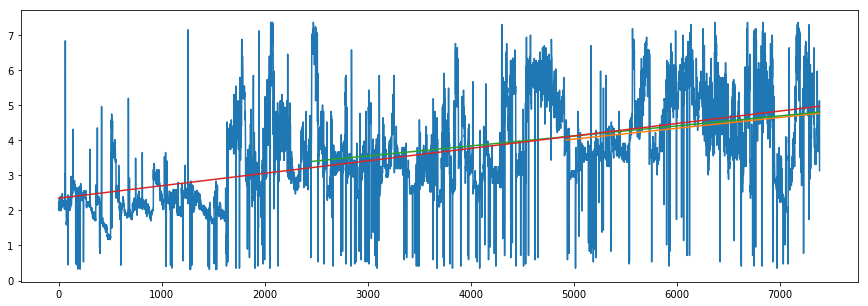

In [33]:
#sklearnによる単回帰*************************************************
#原系列（処理後）に対し
#期間を3つに分けてそれぞれ短期・中期・長期とする場合

#目的変数
df_mod_short=df_mod.iloc[len(df_mod)//3*2:-1,[1]]
df_mod_mid=df_mod.iloc[len(df_mod)//3:-1,[1]]
df_mod_long=df_mod.iloc[:,[1]]

#説明変数
x_short=np.arange(len(df_mod_short)).reshape(-1, 1)
x_mid=np.arange(len(df_mod_mid)).reshape(-1, 1)
x_long=np.arange(len(df_mod_long)).reshape(-1, 1)


#予測モデルを作成（単回帰）
model_short=lr.fit(x_short,df_mod_short)
[a_short] = model_short.coef_
b_short = model_short.intercept_

model_mid=lr.fit(x_mid,df_mod_mid)
[a_mid] = model_mid.coef_
b_mid = model_mid.intercept_

model_long=lr.fit(x_long,df_mod_long)
[a_long] = model_long.coef_
b_long = model_long.intercept_

# パラメータの表示
print("short --- 回帰係数 : {}, 切片 : {}, 決定係数 : {}".format(a_short,b_short, model_short.score(x_short,df_mod_short)))
print("mid --- 回帰係数 : {}, 切片 : {}, 決定係数 : {}".format(a_mid,b_mid, model_mid.score(x_mid,df_mod_mid)))
print("long --- 回帰係数 : {}, 切片 : {}, 決定係数 : {}".format(a_long,b_long, model_long.score(x_long,df_mod_long)))

#プロット
plt.figure(figsize=(15, 5))
plt.plot(x,y)
plt.plot(np.arange(len(df_mod)//3*2+1,len(y)).reshape(-1,1),x_short*a_short+b_short)
plt.plot(np.arange(len(df_mod)//3+1,len(y)).reshape(-1,1),x_mid*a_mid+b_mid)
plt.plot(x,x_long*a_long+b_long)




In [ ]:
#寿命計算





In [ ]:
#ADF(Augmented Dickey-Fuller test)　単位根検定
#帰無仮設”単位根過程（定常過程ではない）である”
#p<0.05で有意水準5%で帰無仮説棄却→定常過程
#p≧0.05なら単位根であるという仮説を棄却できない。→単位根過程

from statsmodels.tsa import stattools

#トレンド項あり（2次まで）、定数項あり
ctt=stattools.adfuller(df_mod["垂直(mm/s)"], regression="ctt")
#トレンド項あり（1次まで）、定数項あり
ct=stattools.adfuller(df_mod["垂直(mm/s)"], regression="ct")
#トレンド項なし、定数項あり
c=stattools.adfuller(df_mod["垂直(mm/s)"], regression="c")
#トレンド項なし、定数項なし
nc=stattools.adfuller(df_mod["垂直(mm/s)"], regression="nc")
print('ctt:{}'.format(ctt))
print('ct:{}'.format(ct))
print('c:{}'.format(c))
print('nc:{}'.format(nc))

In [ ]:
#ADF - 1次階差

#トレンド項あり（2次まで）、定数項あり
ctt=stattools.adfuller(df_mod_diff, regression="ctt")
#トレンド項あり（1次まで）、定数項あり
ct=stattools.adfuller(df_mod_diff, regression="ct")
#トレンド項なし、定数項あり
c=stattools.adfuller(df_mod_diff, regression="c")
#トレンド項なし、定数項なし
nc=stattools.adfuller(df_mod_diff, regression="nc")
print('ctt:{}'.format(ctt))
print('ct:{}'.format(ct))
print('c:{}'.format(c))
print('nc:{}'.format(nc))

In [ ]:
import io
import requests
import statsmodels.api as sm

#自己相関(ACF, Autocorrelation function)
acc_acf=sm.tsa.stattools.acf(df_mod["半径加速度(m/s2)"], nlags=mv1)
#偏自己相関(PCAF, Parcial Autocorrelation function)
acc_pact=sm.tsa.stattools.pacf(df_mod["半径加速度(m/s2)"], nlags=mv1, method='ols')


In [ ]:
acc_acf

In [ ]:
#自己相関(コレログラム)をみる
#青い帯は95%信頼区間で、ここから外れたものが帰無仮設棄却により相関があり

fig=plt.figure(figsize=(15, 10))

#自己相関のグラフ

plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(df_mod["垂直(mm/s)"], lags=mv1)
#plt.title("AUTO CORRELATION")

#偏自己相関のグラフ
plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(df_mod["垂直(mm/s)"], lags=mv1)
#plt.title("PARTIAL AUTO CORRELATION")

In [ ]:
df_mod.info()

In [ ]:
#ARIMA(Seasonal Auto Regressive Integrated Moving Average)モデル
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#学習データ作成
#train=df_mod.loc["半径加速度(m/s2)"].values.reshape(-1, 1)
train=df_mod.loc[0:150,"垂直(mm/s)"].values.reshape(-1, 1) #データを分ける場合

#グリッドサーチによるパラメータチューニング
import itertools

# 各パラメータの範囲を決める
#p = q = range(mv1, mv3+1) #移動平均期間より
p = q = range(mv1, mv3)
d = range(1,2)  #1次階差とする

# p,d,qの組み合わせを列挙するリストを作成
#pdq = list(itertools.product(p, d, q))

#AICによるパラメーター決め
#enforce_stationarity:定されるAR部分が定常性を持つように強制するか否か(デフォルトはTrue)
#enforce_invertibility:推定されるMA部分が反転可能性を持つように強制するか否か(デフォルトはTrue)

best_result = [0, 10000000]
for param in pdq:
    try:
        model=SARIMA(train, order=param, enforce_stationarity=False, enforce_invertibility=False)
        results=model.fit()
        
        print('order{}, AIC:{}'.format(param,results.aic))
        
        if results.aic < best_result[1]:
            best_result=[param, results.aic]
    except:
        continue
print("AICが最も良いモデル", best_result)


In [ ]:
#組み合わせの数
#from scipy.special import comb
#a = comb(mv3-mv1+1,2, exact=True)
#a

In [ ]:
#ARIMA(Auto Regressive Integrated Moving Average)モデル (P52)
#自己回帰和分移動平均）

from statsmodels.tsa.arima_model import ARIMA

ARIMA_3_0_2=ARIMA(train, order=(3,0,2)).fit(disp=False)
print(ARIMA_3_0_2.params)

fig=plt.figure(figsize=(15, 10))

#残差
res_3_0_2=ARIMA_3_0_2.resid
ax1=fig.add_subplot(2,1,1)
plt.bar(range(len(res_3_0_2)), res_3_0_2)
plt.title("RESIDUAL")

#偏自己相関
ax2=fig.add_subplot(2,1,2)
fig=sm.graphics.tsa.plot_pacf(res_3_0_2, lags=168, ax=ax2)
plt.title("PARTIAL AUTO CORRELATION")

#ARIMA_3_0_2.plot_diagnostics(lags=mv3);



In [ ]:
#原系列の表示
plt.plot(df_filtered["垂直(mm/s)"], label="OBSERVED")

#インサンプル（学習データ）と
#ARIMA(3,0,2)による予測値を含めたデータ系列の表示
plt.plot(ARIMA_3_0_2.predict(1,len(df_filtered["垂直(mm/s)"])).values, "--", label="FORECAST")




In [ ]:
#ARIMA(Auto Regressive Integrated Moving Average)モデル
#自己回帰和分移動平均）

#1次階差（トレンド成分除去）
df_filtered_1=df_filtered.diff().dropna()
df_filtered_1["垂直(mm/s)"].plot()

In [ ]:
df_filtered_1["垂直(mm/s)"].tail()

In [ ]:
#差分系列への自動ARMA推定関数の実行
resDiff=sm.tsa.arma_order_select_ic(df_filtered_1["垂直(mm/s)"], ic="aic", trend="nc")
resDiff

In [ ]:
#差分系列への自動ARIMA推定関数の実行

from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2=ARIMA(df_filtered["垂直(mm/s)"], order=(3,1,2)).fit(dist=False)
ARIMA_3_1_2.params

In [ ]:
#残差のチェック
resid=ARIMA_3_1_2.resid
fig=plt.figure(figsize=(15,10))

#残差の自己相関
ax1=fig.add_subplot(2,1,1)
fig=sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=168, ax=ax1)
plt.title("ZANSA JIKO SOUKANN")
#残差の偏自己相関
ax2=fig.add_subplot(2,1,2)
fig=sm.graphics.tsa.plot_pacf(resid, lags=168, ax=ax2)
plt.title("ZANSA HEN JIKO SOUKAN")

In [ ]:
#残差のヒストグラム表示
resid.plot.hist()

In [ ]:
df_filtered_1["2019-09-03 14:53"]

In [ ]:
#データ数の確認
print("全データ数 ")
print(df_filtered_1.info())

print("欠損値 : ")
print(df_filtered_1.isnull().sum())

In [ ]:
#予測
from datetime import datetime
pred=ARIMA_3_1_2.predict('2019-09-03', '2020-10-03')

plt.plot(df_filtered_1['垂直(mm/s)'])
plt.plot(pred, "r")

In [ ]:
#SARIMAモデルの推定
import statsmodels.api as sm

SARIMA_3_1_2_111=sm.tsa.SARIMAX(df_filtered["垂直(mm/s)"], order=(3,1,2), seasonal_order=(1,1,1,12)).fit()
print(SARIMA_3_1_2_111.summary())

In [ ]:
#残差のチェック
resid_SARIMA=SARIMA_3_1_2_111.resid
fig=plt.figure(figsize=(15,10))

#残差の自己相関
ax1=fig.add_subplot(2,1,1)
fig=sm.graphics.tsa.plot_acf(resid_SARIMA.values.squeeze(), lags=168, ax=ax1)
plt.title("ZANSA JIKO SOUKANN")
#残差の偏自己相関
ax2=fig.add_subplot(2,1,2)
fig=sm.graphics.tsa.plot_pacf(resid_SARIMA, lags=168, ax=ax2)
plt.title("ZANSA HEN JIKO SOUKAN")

In [ ]:
#残差のヒストグラム表示
resid_SARIMA.plot.hist()

In [ ]:
#予測
pred=SARIMA_3_1_2_111.predict("2019-10-03 14:51", "2020-10-03 14:51")

plt.plot(df_filtered['垂直(mm/s)'])
plt.plot(pred, "r")